In [1]:
%matplotlib inline
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as npy
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as npy
import numpy.ma as ma
import cartopy.crs as ccrs
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [3]:
file="/media/extra/DATA/NACHOS12/NACHOS12.L75-I/NACHOS12.L75_bathymetry_20S_80N_nfrontiercleaned_repeat3_retouchbalt.nc"

ds=xr.open_dataset(file)
bathy=ds.Bathymetry
lat=ds.nav_lat
lon=ds.nav_lon

In [4]:
bathy_m = npy.ma.array(bathy)
bathy_ma = npy.ma.masked_where(bathy_m < 10 , bathy_m)

/home/albert/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


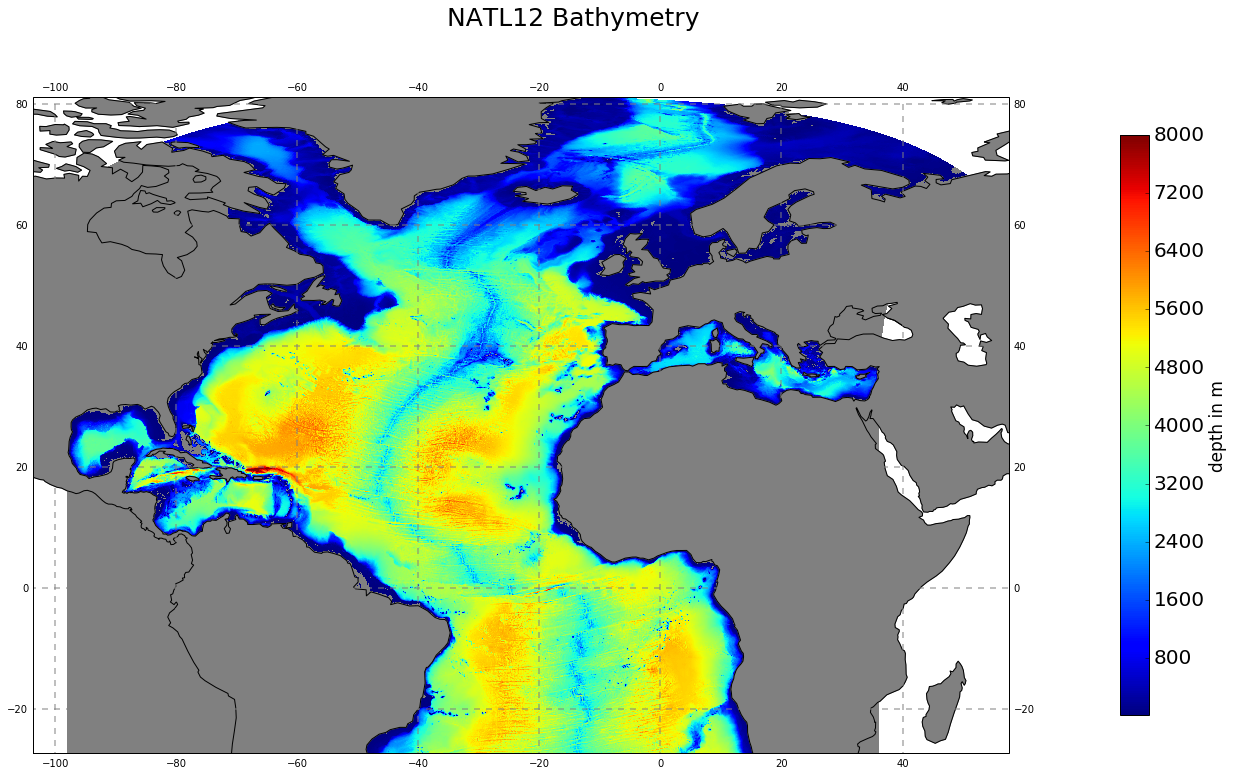

In [51]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,bathy_ma,transform=ccrs.PlateCarree(),cmap=cmap,vmin=15,vmax=8000)
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.xlabels_top = False
ax.ylabels_left = False
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1)
cbar.set_label("depth in m",size=17)
cbar.ax.tick_params(labelsize=20)
plt.suptitle("NATL12 Bathymetry",y=0.9,fontsize=25)
plt.savefig("bathy_natl12_platecarree.png")


/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


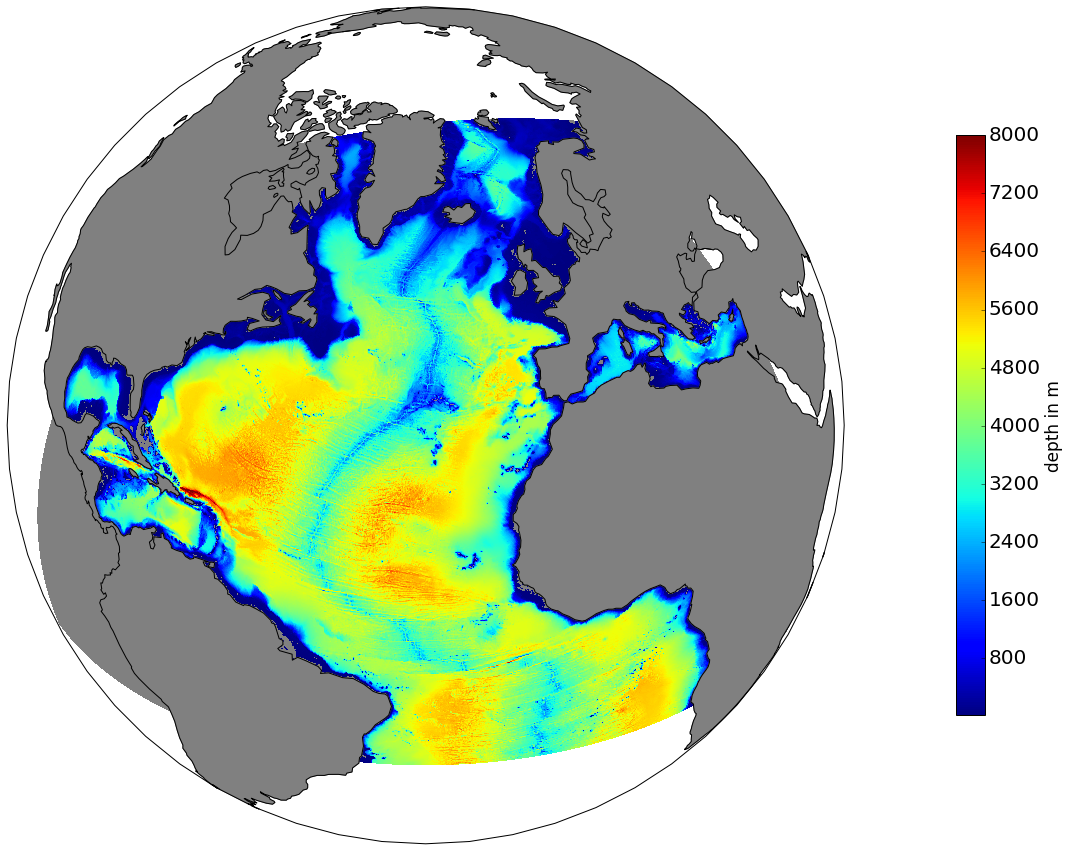

In [5]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,bathy_ma,transform=ccrs.PlateCarree(),cmap=cmap,vmin=15,vmax=8000)
ax.set_global()
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1)
cbar.set_label("depth in m",size=17)
cbar.ax.tick_params(labelsize=20)
#plt.suptitle("NACHOS12 Bathymetry",y=0.95,fontsize=25)
plt.savefig("bathy_nachos12_ortho.png")


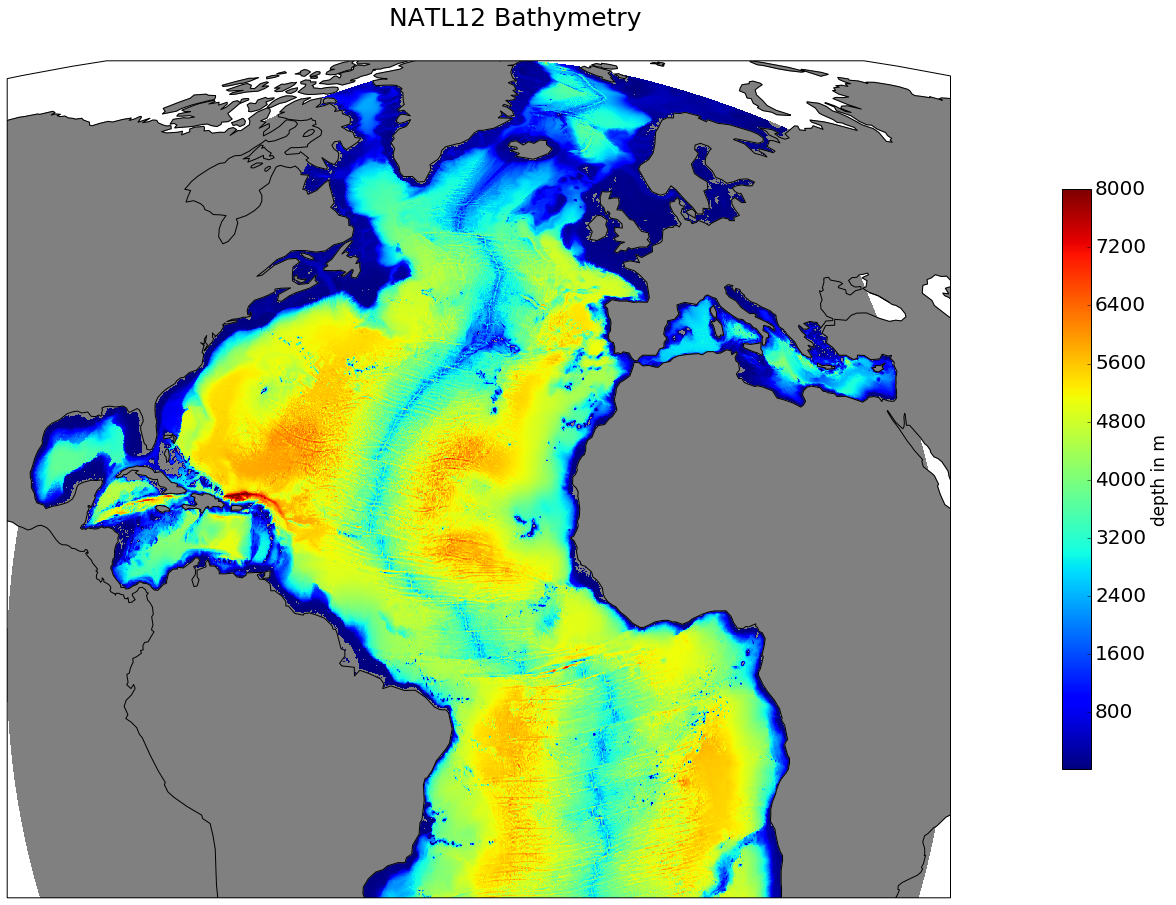

In [55]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection=ccrs.Mollweide(central_longitude=-30))
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,bathy_ma,transform=ccrs.PlateCarree(),cmap=cmap,vmin=15,vmax=8000)
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1)
cbar.set_label("depth in m",size=17)
cbar.ax.tick_params(labelsize=20)
plt.suptitle("NATL12 Bathymetry",y=0.95,fontsize=25)
plt.savefig("bathy_natl12_mollweide.png")


### Plotting directly from xarray

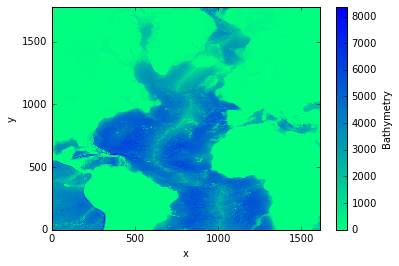

In [2]:
file="~/Data/eORCA12/NATL12/NATL12ext_bathymetry.nc"

ds=xr.open_dataset(file)
bathy=ds.Bathymetry

bathy.plot(cmap='winter_r')

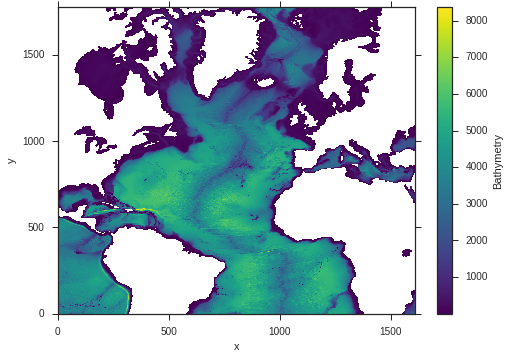

In [17]:
bathy_ma=bathy.where(bathy>0)
bathy_ma.plot()

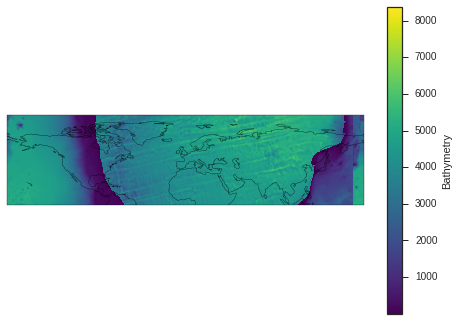

In [20]:
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)

bathy_ma.plot.pcolormesh(ax=ax)

ax.coastlines()

### Plotting with matplotlib 

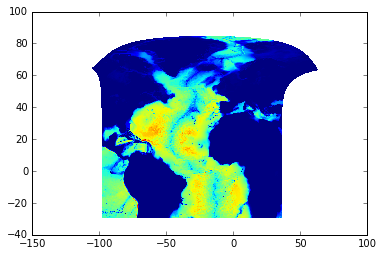

In [5]:
plt.pcolormesh(ds.nav_lon,ds.nav_lat,bathy)

### Plotting with cartopy

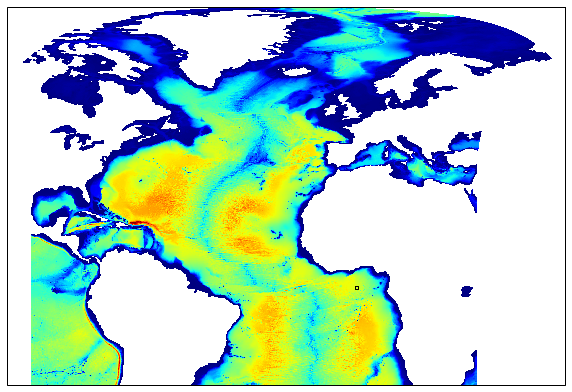

In [3]:
mask = npy.equal(bathy, 0.)
bathy_ma=npy.ma.array(bathy,mask=mask)

lat=ds.nav_lat
lon=ds.nav_lon
plt.figure(figsize=(10,15))
pj = ccrs.Stereographic()
ax = plt.axes(projection=pj)
ax.coastlines(resolution="10m")
cs = plt.pcolormesh(lon, lat, bathy_ma,transform=pj,vmin=0,vmax=8000)

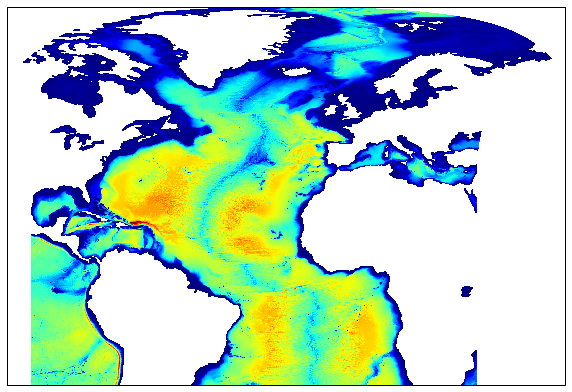

In [7]:
mask = npy.equal(bathy, 0.)
bathy_ma=npy.ma.array(bathy,mask=mask)

lat=ds.nav_lat
lon=ds.nav_lon
plt.figure(figsize=(10,15))
pj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=pj)
ax.coastlines(resolution="10m")
cs = plt.pcolormesh(lon, lat, bathy_ma,transform=pj,vmin=0,vmax=8000)

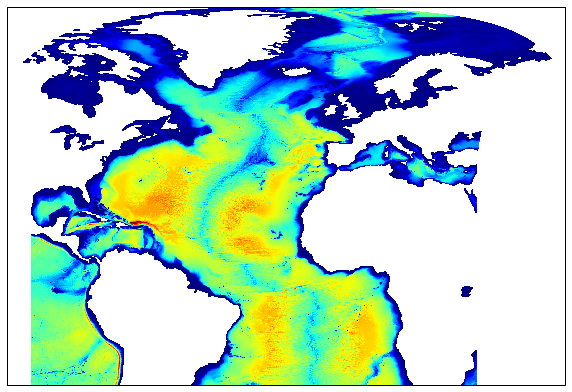

In [8]:
mask = npy.equal(bathy, 0.)
bathy_ma=npy.ma.array(bathy,mask=mask)

lat=ds.nav_lat
lon=ds.nav_lon
plt.figure(figsize=(10,15))
pj = ccrs.LambertConformal()
ax = plt.axes(projection=pj)
cs = plt.pcolormesh(lon, lat, bathy_ma,transform=pj,vmin=0,vmax=8000)
ax.coastlines(resolution="10m")

### Plotting with Basemap

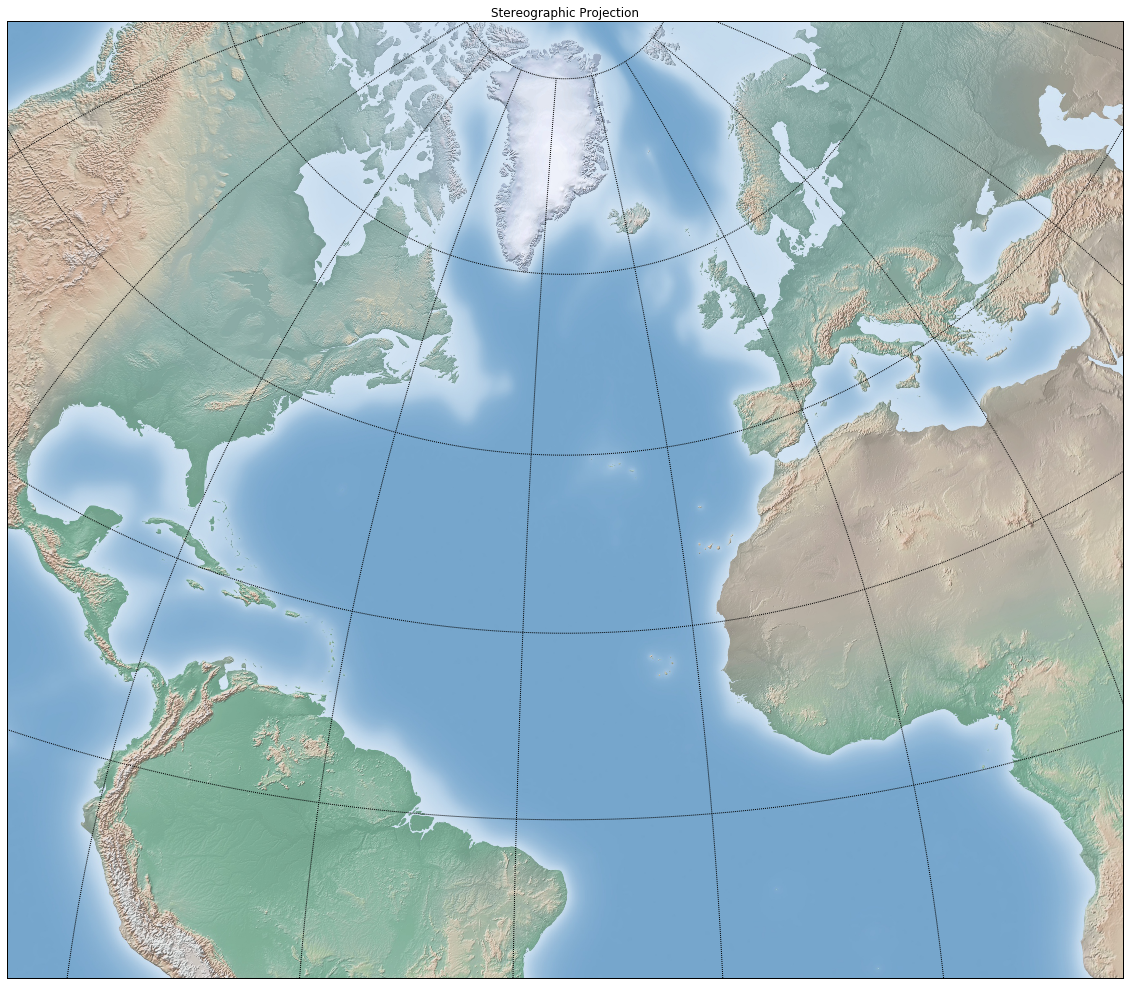

In [10]:
plt.figure(figsize=(20,30))
m = Basemap(width=14000000,height=12000000,
            resolution='l',projection='stere',\
            lat_ts=35,lat_0=35,lon_0=-35.)
m.shadedrelief()

# draw parallels and meridians.
m.drawparallels(npy.arange(-80.,81.,20.))
m.drawmeridians(npy.arange(-180.,181.,20.))
m.drawmapboundary()
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
plt.title("Stereographic Projection")
#x, y = m(lon, lat)

plt.show()

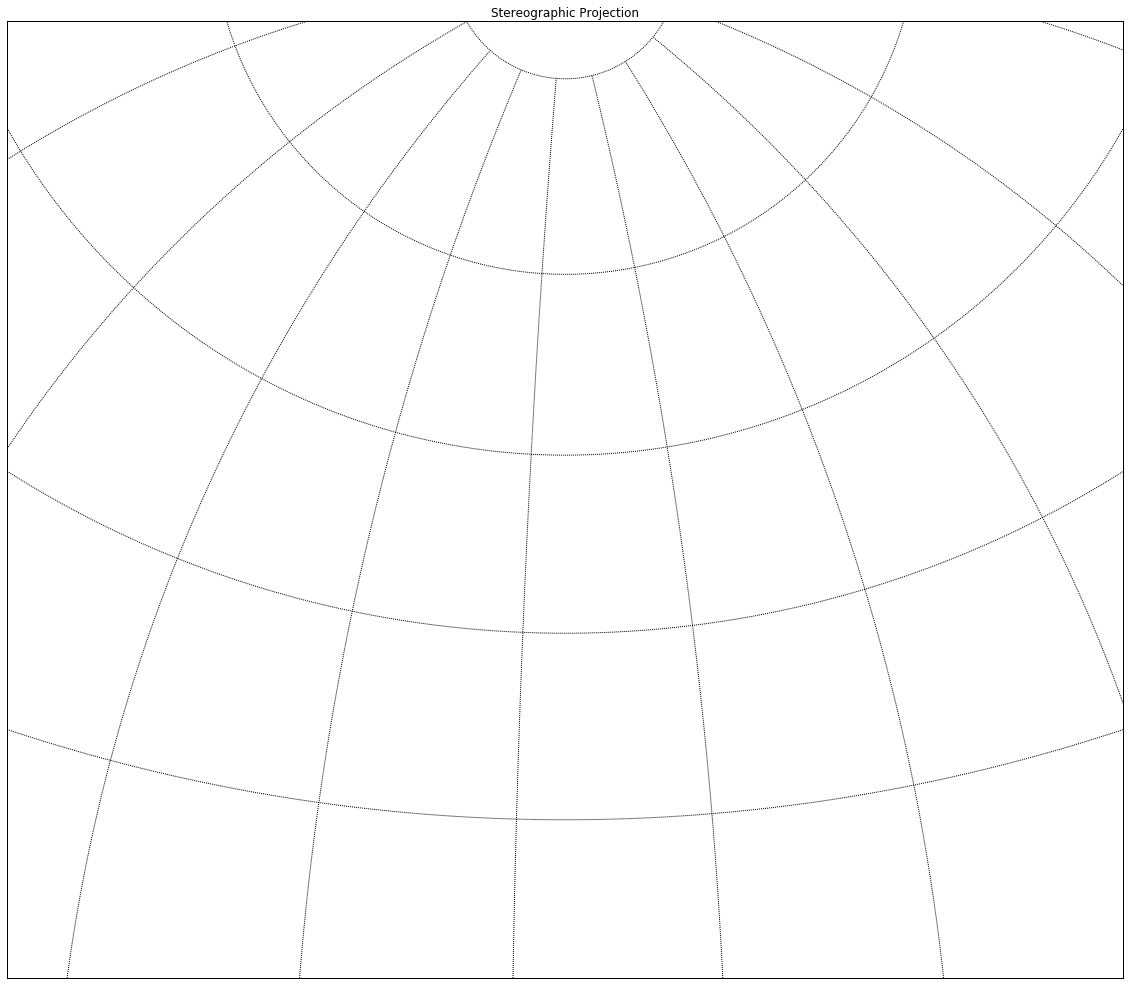

In [12]:
plt.figure(figsize=(20,30))
m = Basemap(width=14000000,height=12000000,
            resolution='l',projection='stere',\
            lat_ts=35,lat_0=35,lon_0=-35.)
#m.shadedrelief()

# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary()
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
plt.title("Stereographic Projection")
#x, y = m(lon, lat)
cs = m.contourf(lon, lat, bathy_ma)
plt.show()

### Plotting with basemap another example

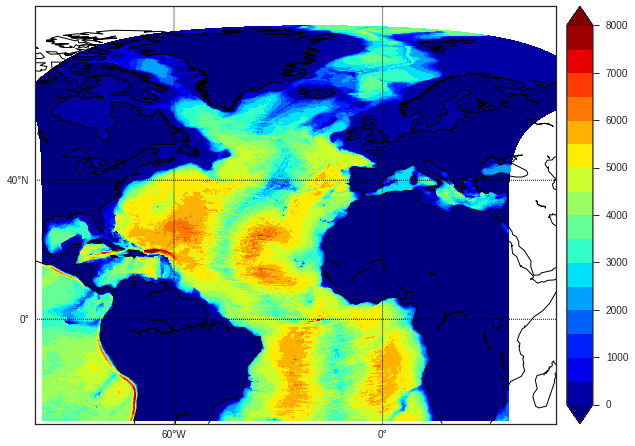

In [25]:
m = Basemap(projection='cyl',llcrnrlat=-30,urcrnrlat=90,\
            llcrnrlon=-100,urcrnrlon=50,\
            lat_ts=0,resolution='c')

def plot_field(X, lat, lon, vmin, vmax, step, cmap=plt.get_cmap('jet'), ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(10, (X.shape[0] / float(X.shape[1])) * 10))
    m.ax = ax
    im = m.contourf(lon, lat, X, np.arange(vmin, vmax+step, step), latlon=True, cmap=cmap, extend='both', ax=ax)
    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1])
        m.drawparallels([-40, 0, 40], labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)
plot_field(bathy, lat, lon, 0, 8000, 500, grid=True)


RuntimeError: 

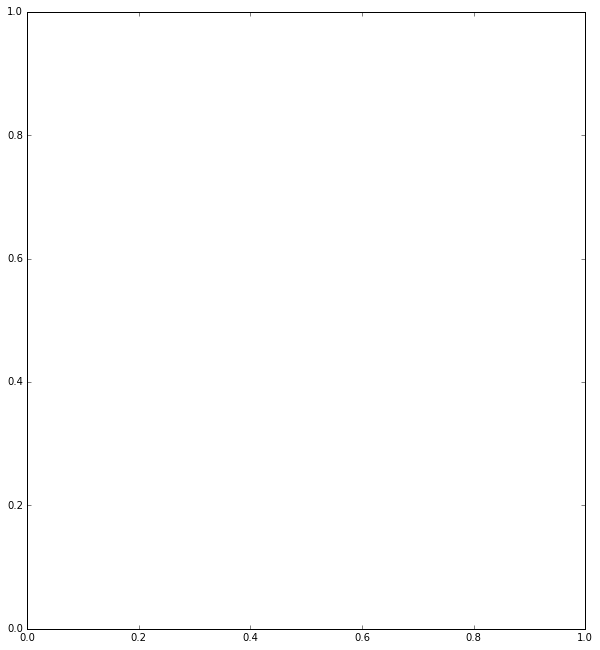

In [16]:
m = Basemap(width=14000000,height=12000000,\
            resolution='l',projection='stere',\
            lat_ts=35,lat_0=35,lon_0=-35.)

def plot_field(X, lat, lon, vmin, vmax, step, cmap=plt.get_cmap('jet'), ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(10, (X.shape[0] / float(X.shape[1])) * 10))
    m.ax = ax
    im = m.contourf(lon, lat, X, np.arange(vmin, vmax+step, step), latlon=True, cmap=cmap, extend='both', ax=ax)
    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1])
        m.drawparallels([-40, 0, 40], labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)
plot_field(bathy, lat, lon, 0, 8000, 500, grid=True)


RuntimeError: 

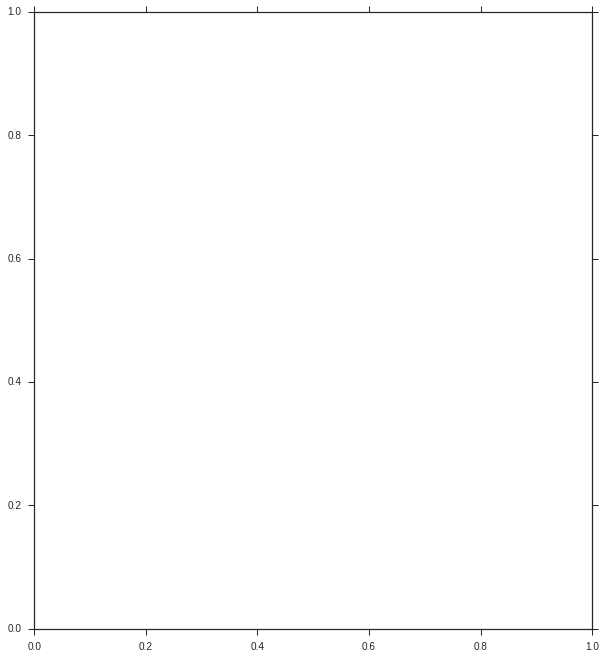

In [26]:
m = Basemap(projection='merc',llcrnrlat=-30,urcrnrlat=90,\
            llcrnrlon=-100,urcrnrlon=100,\
            lat_ts=35,resolution='c')

def plot_field(X, lat, lon, vmin, vmax, step, cmap=plt.get_cmap('jet'), ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(10, (X.shape[0] / float(X.shape[1])) * 10))
    m.ax = ax
    im = m.contourf(lon, lat, X, np.arange(vmin, vmax+step, step), latlon=True, cmap=cmap, extend='both', ax=ax)
    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1])
        m.drawparallels([-40, 0, 40], labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)
plot_field(bathy, lat, lon, 0, 8000, 500, grid=True)


### Test using iris

__source__ : http://www.danielrothenberg.com/blog/2015/Jul/plotting-hycomrtofs-sst-data-in-python/

In [4]:
import netCDF4 as nc
import numpy as np
import xarray as xr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [5]:
file="~/Data/eORCA12/NATL12/NATL12ext_bathymetry.nc"

ds=xr.open_dataset(file)
bathy=ds.Bathymetry


In [6]:
bathy2=ds.Bathymetry.values.ravel()

In [7]:
bathy_masked = bathy2[bathy2==0.]

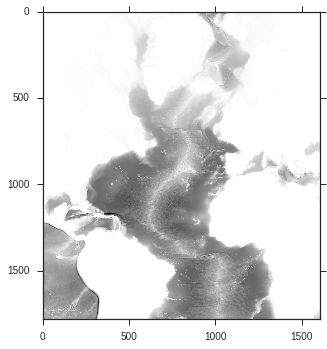

In [8]:
plt.imshow(ds.Bathymetry[::-1,...])

In [9]:
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt

In [10]:
cubes = iris.load(file)

/home/albert/anaconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [11]:
print cubes

0: bathymetry / (m)                    (-- : 1779; -- : 1609)
1: iceshelf draft / (m)                (-- : 1779; -- : 1609)
2: bathymetry with isf cavity masked / (m) (-- : 1779; -- : 1609)


In [12]:
bathy_c = cubes.extract("bathymetry", strict=True)
print bathy_c

bathymetry / (m)                    (-- : 1779; -- : 1609)
     Auxiliary coordinates:
          latitude                      x          x
          longitude                     x          x
     Attributes:
          NCO: "4.6.3"
          history: Mon Feb 13 17:47:13 2017: /home/users/albert6a/anaconda2/bin/ncks -O -F...


In [13]:
import iris.analysis.cartography as iac
    

bathy_c.remove_coord(bathy_c.coord(var_name='y'))
bathy_c.remove_coord(bathy_c.coord(var_name='x'))



CoordinateNotFoundError: 'Expected to find exactly 1  coordinate, but found none.'

In [14]:
new_bathy, extent = iac.project(bathy_c, ccrs.PlateCarree())

/home/albert/anaconda2/lib/python2.7/site-packages/iris/analysis/cartography.py:597: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn('Coordinate system of latitude and longitude '


In [15]:
print new_bathy

bathymetry / (m)                    (projection_y_coordinate: 1779; projection_x_coordinate: 1609)
     Dimension coordinates:
          projection_y_coordinate                           x                              -
          projection_x_coordinate                           -                              x
     Auxiliary coordinates:
          latitude                                          x                              x
          longitude                                         x                              x
     Attributes:
          NCO: "4.6.3"
          history: Mon Feb 13 17:47:13 2017: /home/users/albert6a/anaconda2/bin/ncks -O -F...


In [27]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
bathy.plot.contourf(ax=ax, transform=ccrs.PlateCarree())

RuntimeError: Unidentified problem with geometry, linestring being re-added. Please raise an issue.

Error in callback <function post_execute at 0x7f31738b9758> (for post_execute):


RuntimeError: Unidentified problem with geometry, linestring being re-added. Please raise an issue.

RuntimeError: Unidentified problem with geometry, linestring being re-added. Please raise an issue.

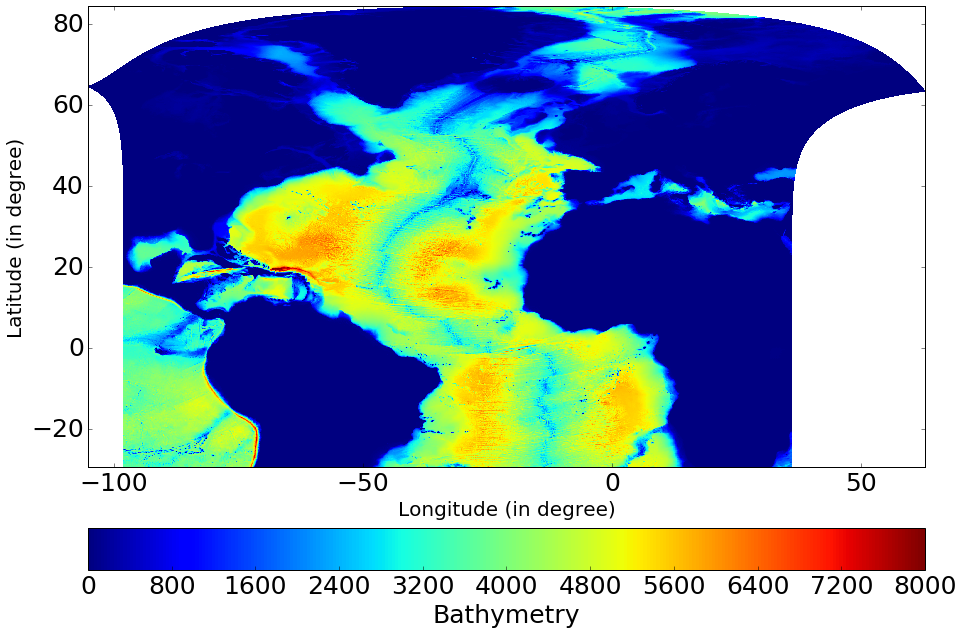

In [8]:
cont1=npy.isnan(bathy)

plt.figure(figsize=(15,11))

ax = plt.subplot(111)

ax.autoscale(tight=True)

pcolor = ax.pcolormesh(lon,lat,
    ma.masked_invalid(bathy),vmin=0,vmax=8000,alpha=1)
ax.tick_params(labelsize=25)
#ax.contour(lon,lat,cont1,alpha=0.5,linewidth=0.000001,antialiased=True)

cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.1)
cbar.ax.tick_params(labelsize=35)

ax.set_xlabel('Longitude (in degree)',fontsize=20)
ax.set_ylabel('Latitude (in degree)',fontsize=20)
cbar.ax.tick_params(labelsize=25)
cbar.set_label('Bathymetry',fontsize=25)